# Spectral method

In [1]:
import numpy as np
from numpy.fft import fft,ifft,fftshift
import matplotlib.pyplot as plt

## Fourier spectral method

In [2]:
L = 2.0*np.pi

N = 100
dx = L/N
x = np.linspace(0, L, N, endpoint=False)

q = 2.0*np.pi/L
k = np.linspace(-N/2, N/2, N, endpoint=False)
k = fftshift(k)

In [3]:
# u: target function
# du = u'
# d2u = u''

#w = 3.0
#u = np.sin(w*x)
#du_exact = w*np.cos(w*x)
#d2u_exact = -(w**2)*np.sin(w*x)

u = np.exp(np.sin(x))
du_exact = np.cos(x)*u
d2u_exact = np.cos(x)*du_exact - np.sin(x)*u

# u_fft: fft of u
u_fft = fft(u)
du_fft = 1j*q*k*u_fft
d2u_fft = -(q**2)*(k**2)*u_fft

du = np.real(ifft(du_fft))
d2u = np.real(ifft(d2u_fft))

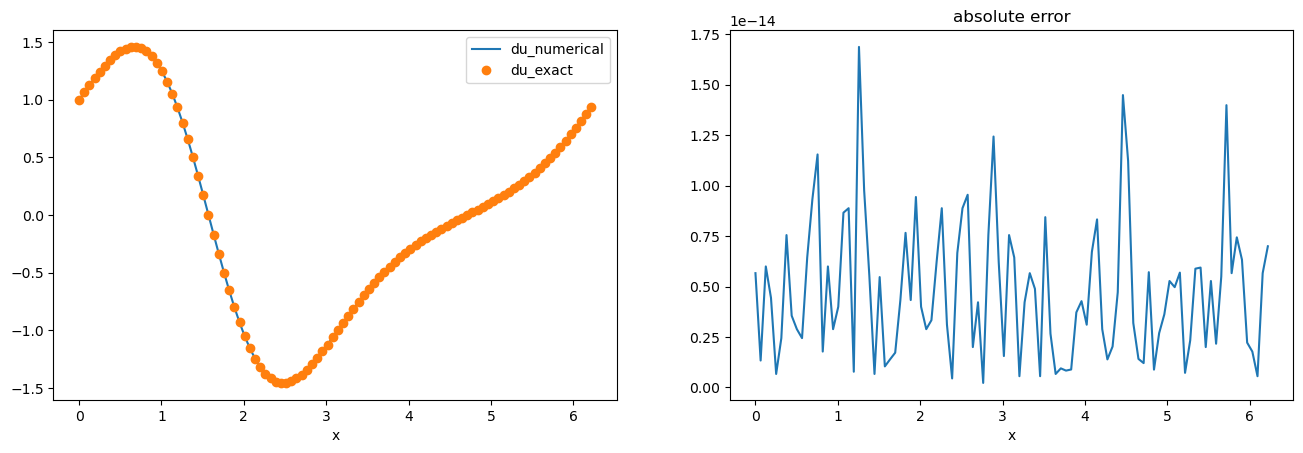

In [4]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x, du, label='du_numerical')
ax.plot(x, du_exact, 'o', label='du_exact')
ax.legend()
ax.set_xlabel('x')

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, np.abs(du-du_exact))
ax.set_title('absolute error')
ax.set_xlabel('x')

plt.show()

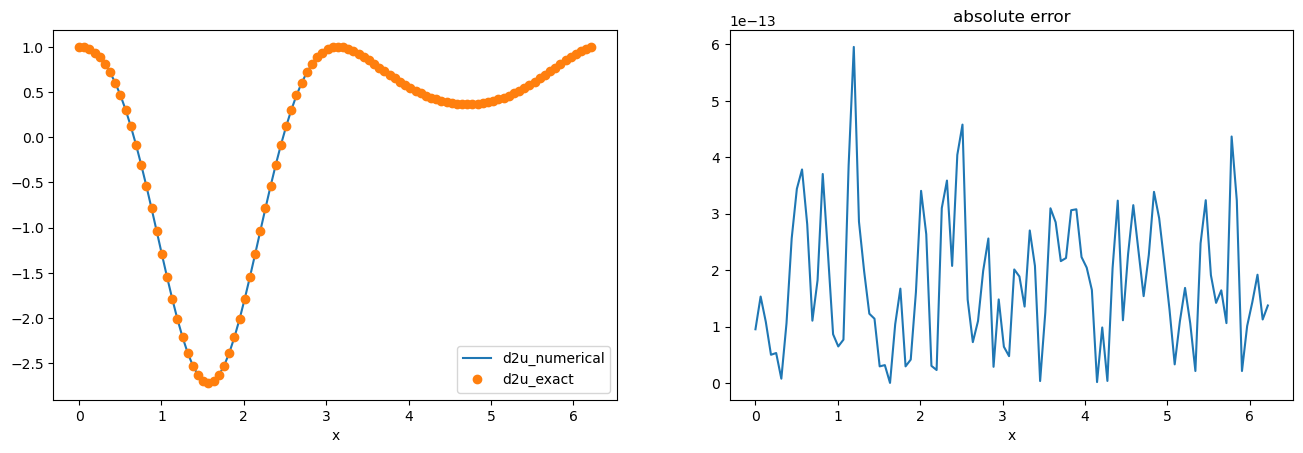

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x, d2u, label='d2u_numerical')
ax.plot(x, d2u_exact, 'o', label='d2u_exact')
ax.legend()
ax.set_xlabel('x')

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, np.abs(d2u-d2u_exact))
ax.set_title('absolute error')
ax.set_xlabel('x')

plt.show()

## Chebyshev spectral method

Consider $f(x) = x^5$, the corresponding Chebyshev coefficients are $f_k=[0, \frac{5}{8}, 0, \frac{5}{16}, 0, \frac{1}{16}]$

In [6]:
N = 10

# Chebyshev points of the second kind
x = np.cos(np.linspace(0, N, N+1, endpoint=True)*np.pi/N)

# evaluate at grid points
f = x**5

# extend the function and take scaled FFT
f_extend = np.append(f, f[N-1:0:-1])
f_hat = fft(f_extend)/(2*N)

# recover the Chebyshev coefficients
a = np.zeros(N+1)
a[0] = np.real(f_hat[0])
a[1:N] = 2.0*np.real(f_hat[1:N])
a[N] = np.real(f_hat[N])

print('Computed coefficients:')
print(a)
print()
print('True coefficients:')
print([0, 5.0/8.0, 0, 5.0/16.0, 0, 1.0/16.0])

Computed coefficients:
[ 3.51715185e-17  6.25000000e-01  5.23197976e-18  3.12500000e-01
 -5.58419984e-17  6.25000000e-02 -1.54234802e-17  1.33226763e-16
  2.06704800e-17  7.77156117e-17  1.01915004e-17]

True coefficients:
[0, 0.625, 0, 0.3125, 0, 0.0625]


### Chebyshev differentiation via FFT

In [7]:
N = 20

# Chebyshev points of the second kind
x = np.cos(np.linspace(0, N, N+1, endpoint=True)*np.pi/N)

# evaluate at grid points
f = np.exp(np.sin(x))
df_exact = np.cos(x)*f

# extend the function and take scaled FFT
f_extend = np.append(f, f[N-1:0:-1])
f_fft = fft(f_extend)
f_hat = fft(f_extend)/(2*N)

# recover the Chebyshev coefficients
a = np.zeros(N+1)
a[0] = np.real(f_hat[0])
a[1:N] = 2.0*np.real(f_hat[1:N])
a[N] = np.real(f_hat[N])

# Fourier modes
k = np.linspace(-N, N, 2*N, endpoint=False)
k = fftshift(k)

df_theta = np.real(ifft(1j*k*f_fft))

df = f*0;
df[1:N] = -df_theta[1:N]/np.sqrt(1-x[1:N]**2);

kk = np.linspace(0, N, N+1, endpoint=True)
df[0] = np.sum((kk**2)*a)
df[N] = -np.sum(((-1)**kk)*(kk**2)*a)

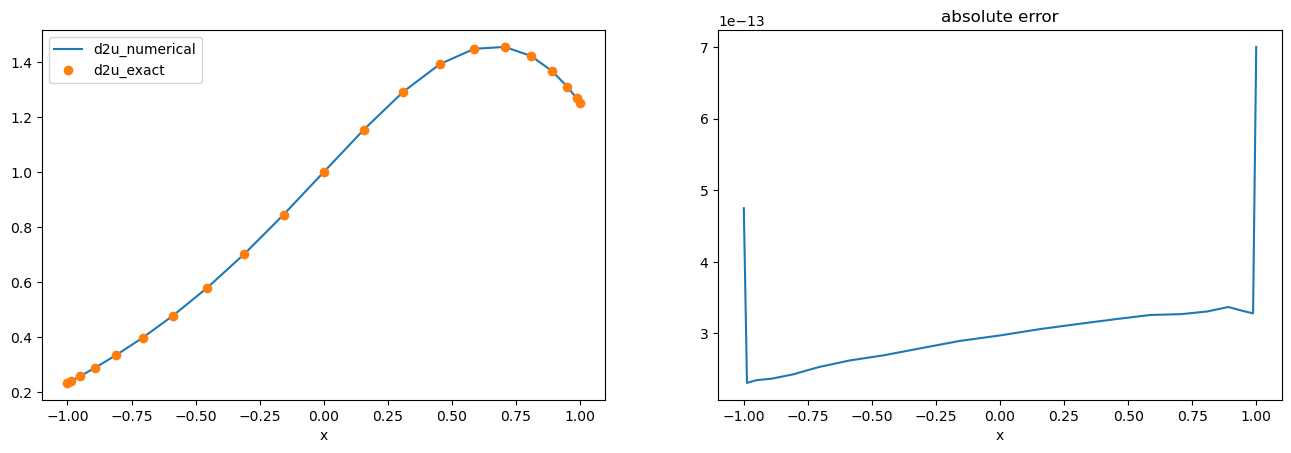

In [8]:
fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x, df, label='d2u_numerical')
ax.plot(x, df_exact, 'o', label='d2u_exact')
ax.legend()
ax.set_xlabel('x')

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, np.abs(df-df_exact))
ax.set_title('absolute error')
ax.set_xlabel('x')

plt.show()